# Seaborn: pairplot

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from ipywidgets import interactive

import warnings
warnings.filterwarnings("ignore")

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Intro Visuals

In [4]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    

In [5]:
sns.set_style('darkgrid')

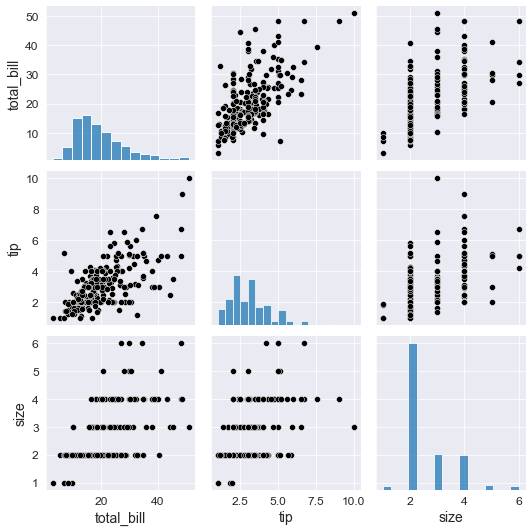

In [6]:
sns.pairplot(tips,  plot_kws={'color':'black'})
plt.tight_layout();

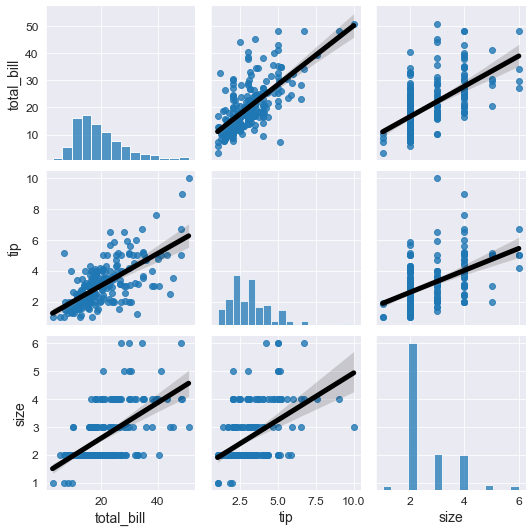

In [7]:
sns.pairplot(tips, kind='reg', plot_kws={'line_kws': {'color':'black', 'lw': 5}})
plt.tight_layout();

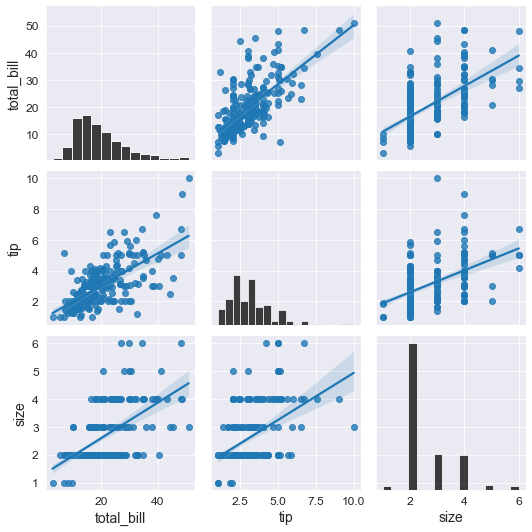

In [8]:
sns.pairplot(tips, kind='reg',
             diag_kws={'color': 'black'}
            )
plt.tight_layout();

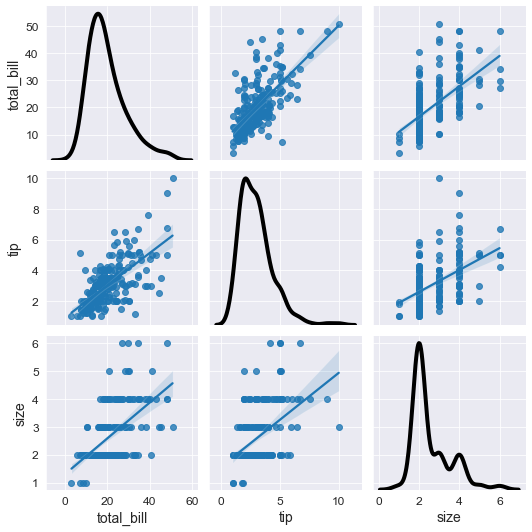

In [9]:
sns.pairplot(tips, diag_kind='kde', kind='reg',
             diag_kws={'color': 'black', 'shade':False, 'lw': 4}
            )
plt.tight_layout();

In [10]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)

## Basics

In [11]:
sns.set_style('darkgrid')

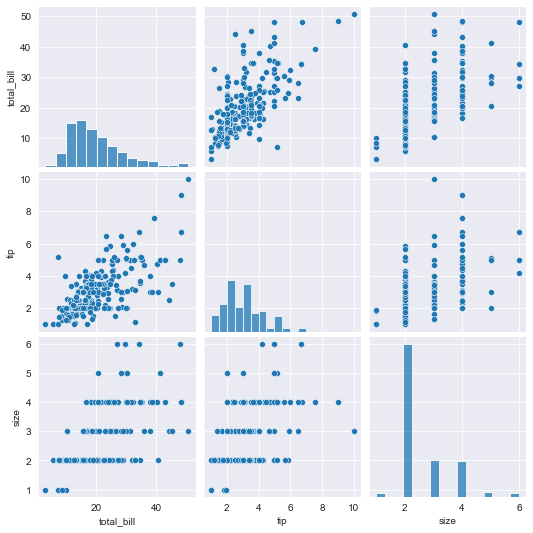

In [12]:
sns.pairplot(tips);

In [13]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Note that the axes tick labels correspond to the bivariate, relational plots and NOT the distribution plots.

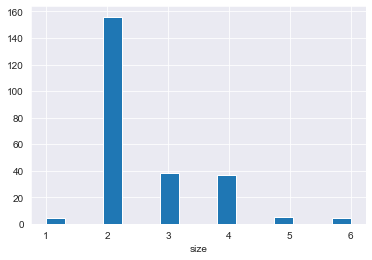

In [14]:
sns.distplot(tips['size'], 
             kde=False, 
             hist_kws={'alpha':1});  

## Plot Kinds

### diag_kind

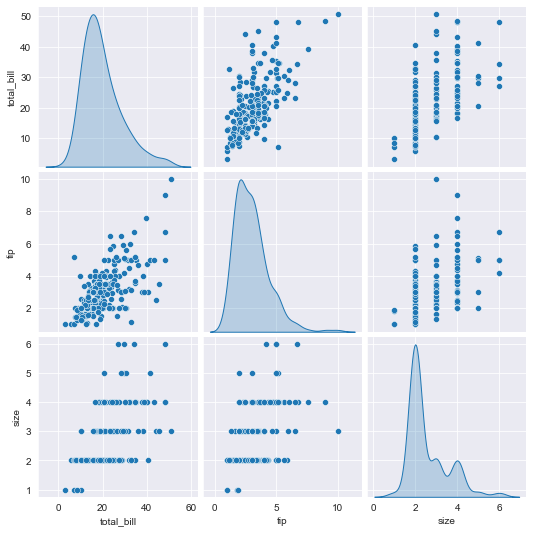

In [15]:
sns.pairplot(tips, diag_kind='kde');

### kind

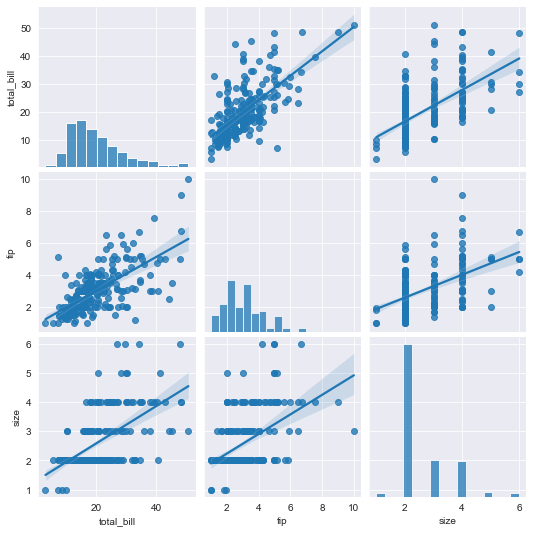

In [16]:
sns.pairplot(tips, kind='reg');

### Returns PairGrid

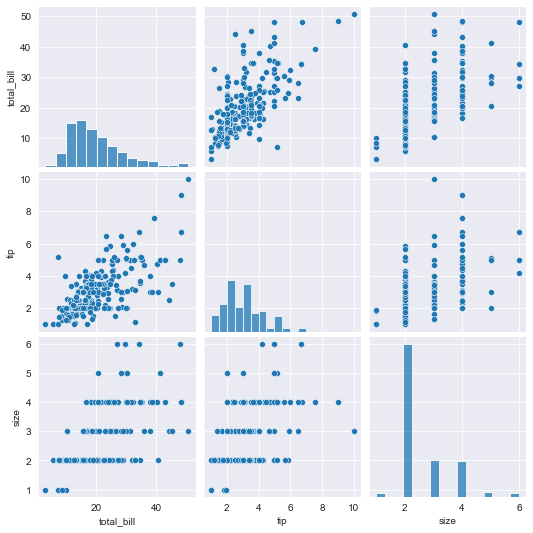

In [17]:
g = sns.pairplot(tips)

In [18]:
type(g)

seaborn.axisgrid.PairGrid

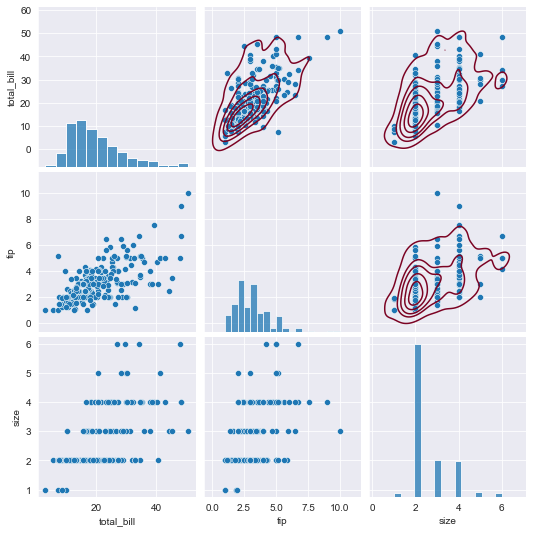

In [19]:
g = sns.pairplot(tips)
g.map_upper(sns.kdeplot, n_levels=6, color='xkcd:wine red');

## Categorical and Specific Variables

In [20]:
tips['weekend'] = tips.day.isin(['Sat', 'Sun'])

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


### hue

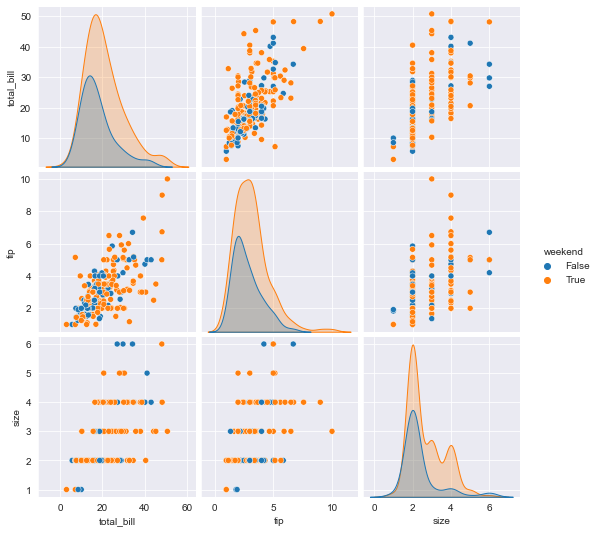

In [22]:
sns.pairplot(tips, hue='weekend');

In [23]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
weekend           bool
dtype: object

### vars, x_vars, y_vars

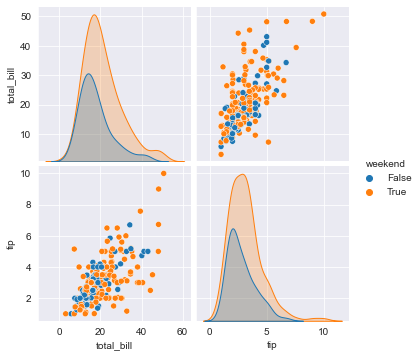

In [24]:
sns.pairplot(tips, hue='weekend', vars=['total_bill', 'tip']);

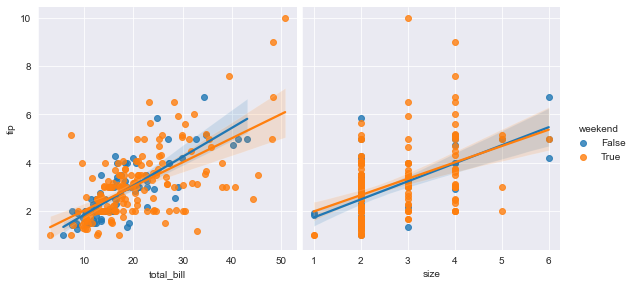

In [25]:
sns.pairplot(tips, 
             hue='weekend', 
             y_vars=['tip'],
             x_vars=['total_bill', 'size'],
             kind='reg', 
             height=4);

## Styling

In [26]:
del tips['weekend']

### height, aspect

In [27]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(tips, height=height, aspect=aspect)

In [28]:
interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

### palette

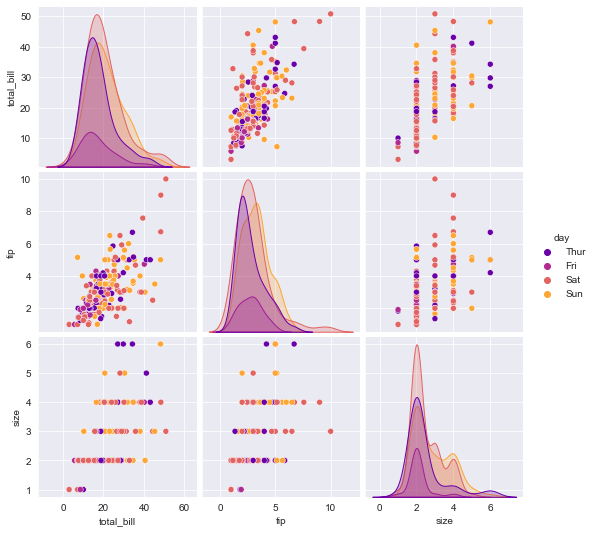

In [29]:
sns.pairplot(tips, hue='day', palette='plasma');

### diag_kws, plot_kws

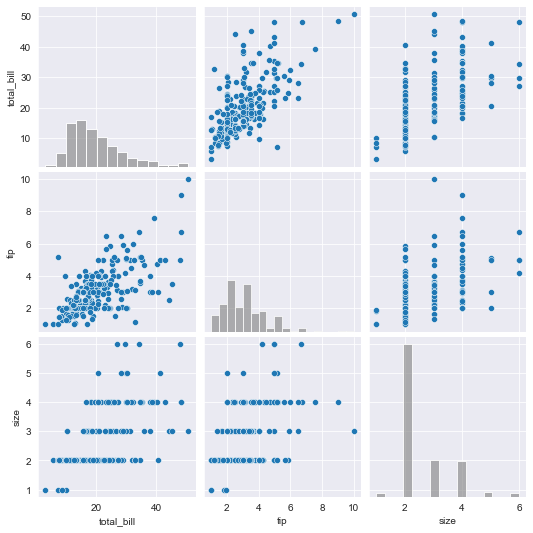

In [30]:
sns.pairplot(tips, diag_kws={'color': 'gray', 'alpha': 0.6});

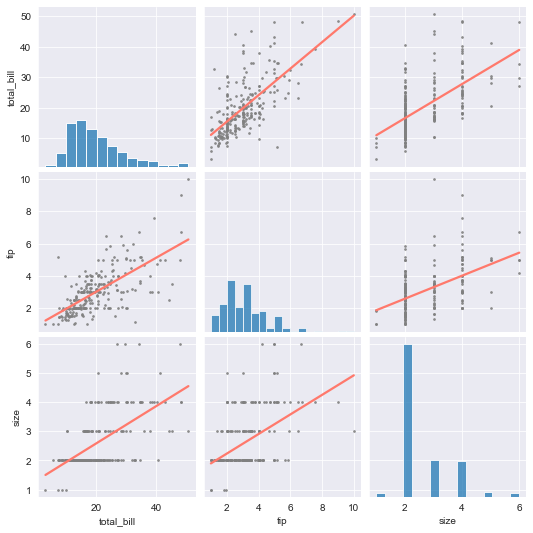

In [31]:
sns.pairplot(tips, 
             kind='reg',
             plot_kws={'ci':None, 'color': 'xkcd:salmon',
                       'scatter_kws': {'color': 'gray', 's': 3}
                      }
            );